# A handwriting recognition project

We'll train a deep learning ML model that will be able to recognise handwritten digits from 0-9

## Importing the required librarires

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

## Loading the training and testing data
mnist is a dataset that contains handwriting data of 70,000 samples(60k train and 10k test).
It contains numbers from 0-9 in the form of 28x28 matrix

In [2]:
num_classes = 10
num_features = 784
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train/255, x_test/255

In [3]:
# x_test
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Graphical Analysis
See as to how each entry of the dataset looks like

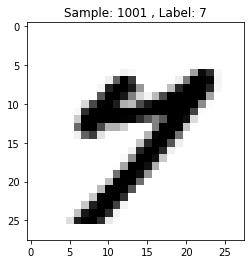

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

def display_sample(num):
    label = y_train[num]

    image = x_train[num].reshape([28, 28])

    plt.title('Sample: %d , Label: %d' %(num, label))
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()

display_sample(1001)

## Data Visualisation

See the form in which data is fed into the neural network

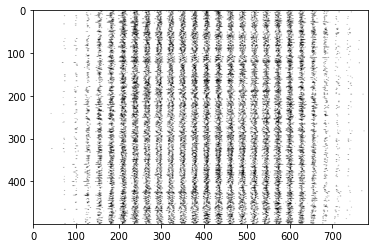

In [5]:
images = x_train[0].reshape([1, 784])
for i in range(1, 500):
    images = np.concatenate((images, x_train[i].reshape([1, 784])))
plt.imshow(images, cmap = plt.get_cmap('gray_r'))
plt.show()

### Setting learning parameters and default values

In [74]:
learning_rate = 0.001
batch_size = 250
training_steps = 3000
display_step = 100

# The number of neurons in the hidden layer
n_hidden = 128

In [7]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(60000).batch(batch_size).prefetch(1)

2022-02-17 21:03:09.744152: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [75]:
random_normal = tf.initializers.RandomNormal()
# Setting random weights and zero biases initially
# def update():
weights = {
    'h' : tf.Variable(random_normal([num_features, n_hidden])),
    'out' : tf.Variable(random_normal([n_hidden, num_classes]))
}
biases = {
    'b' : tf.Variable(tf.zeros([n_hidden])),
    'out' : tf.Variable(tf.zeros([num_classes]))
}
    # return


### Creating the actual neural net

In [62]:
def neural_net(inputData):
    # hidden_layer_in = input * (weights) + bias
    # update()
    hidden_layer = tf.add(tf.matmul(inputData, weights['h']), biases['b'])
    # Apply activation function to hidden layer
    hidden_layer = tf.nn.sigmoid(hidden_layer)

    out_layer = tf.matmul(hidden_layer, weights['out']) + biases['out']
    # Apply softmax function to normalize the answer to probability distribution
    return tf.nn.softmax(out_layer)

## Cross Entropy (The loss function)
Now, we do one hot encoding of the true y values i.e. 1 will be represented by a vector of size 10 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0].  
Here, we calculate entropy(randomness) of our data = -∑p*logp

In [10]:
def cross_entropy(y_pred, y_true):
    
    y_true = tf.one_hot(y_true, depth= num_classes)

    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.) # limits the values b/w the given range
    # The values smaller than 1e-9 will be equall to 1e-9 and > 1 will become equal to 1

    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

## Designing the Optimiser  

The below code updates the weights and biases using the gradient descent algorithm

In [15]:
optimizer = tf.keras.optimizers.SGD(learning_rate)

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = cross_entropy(pred, y)
    # Variables to be updated
    trainable_variables = list(weights.values()) + list(biases.values())
    # Calculating the gradients
    gradients = g.gradient(loss, trainable_variables)
    # Updating the weights
    optimizer.apply_gradients(zip(gradients, trainable_variables))

## Accuracy checker

In [13]:
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis = -1)

## Training the neural network finally

In [79]:
# Let's train the model !!!!!

for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)

    if step % display_step == 0: # For every display_step(100) steps, we print the loss and accuracy to analyse the training of our model
        pred = neural_net(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("Training epoch: %i, Loss: %f, Accuracy: %f" % (step, loss, acc))

Training epoch: 100, Loss: 40.769665, Accuracy: 0.952000
Training epoch: 200, Loss: 73.692810, Accuracy: 0.912000
Training epoch: 300, Loss: 36.199879, Accuracy: 0.960000
Training epoch: 400, Loss: 54.679878, Accuracy: 0.948000
Training epoch: 500, Loss: 45.813564, Accuracy: 0.956000
Training epoch: 600, Loss: 46.542000, Accuracy: 0.968000
Training epoch: 700, Loss: 36.478882, Accuracy: 0.956000
Training epoch: 800, Loss: 45.835800, Accuracy: 0.948000
Training epoch: 900, Loss: 54.252884, Accuracy: 0.948000
Training epoch: 1000, Loss: 50.225182, Accuracy: 0.928000
Training epoch: 1100, Loss: 37.430077, Accuracy: 0.952000
Training epoch: 1200, Loss: 45.586906, Accuracy: 0.944000
Training epoch: 1300, Loss: 29.829819, Accuracy: 0.968000
Training epoch: 1400, Loss: 44.033966, Accuracy: 0.932000
Training epoch: 1500, Loss: 34.169685, Accuracy: 0.960000
Training epoch: 1600, Loss: 27.205791, Accuracy: 0.976000
Training epoch: 1700, Loss: 49.507698, Accuracy: 0.964000
Training epoch: 1800, L

## Testing the net over the test data

In [80]:
pred = neural_net(x_test)
print("Accuracy %f" % accuracy(pred, y_test))

Accuracy 0.956500


<pre> 
Hidden Layer Neurons     Accuracy  

  512                       95.5
  256                       95.5
  128                       95.7
  96                        94.2
  64                        94.2

</pre>
So, *192* neurons in the hidden layer seem to maximise our accuracy and get the best results


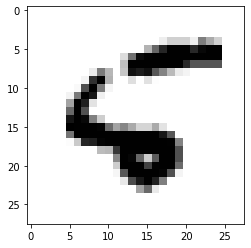

Original Labels: 5
Predicted Labels: 6


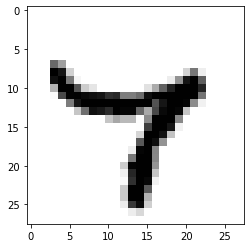

Original Labels: 7
Predicted Labels: 4


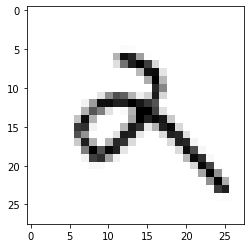

Original Labels: 2
Predicted Labels: 9


In [44]:
n_images = 200
test_images = x_test[:n_images]
test_labels = y_test[:n_images]
predictions = neural_net(test_images)

for i in range(n_images):
    model_prediction = np.argmax(predictions.numpy()[i])
    if (model_prediction != test_labels[i]):
        plt.imshow(np.reshape(test_images[i], [28, 28]), cmap = 'gray_r')
        plt.show()
        print('Original Labels: %i' % test_labels[i])
        print('Predicted Labels: %i' % model_prediction)

In [45]:
tf.print(weights)

{'h': [[0.00218873564 -0.040010538 -0.0463884585 ... 0.00802386925 0.0222775843 0.0778919458]
 [0.0994899496 -0.105709516 -0.0368865691 ... -0.0151424129 -0.0574417897 0.0243017636]
 [0.0753901303 0.0298488345 0.0157777723 ... 0.0434842892 0.0447117053 -0.0865836143]
 ...
 [-0.103256345 0.0392538421 0.0509502105 ... 0.00928486 0.0135362493 -0.000128037587]
 [0.0821935087 -0.0762153119 -0.0173242129 ... 0.0414138548 0.0324236974 -0.0267787911]
 [0.0283564162 0.0546400733 -0.0513204224 ... 0.0381985977 -0.0463807546 -0.0422497801]], 'out': [[0.983399153 -0.337069184 -0.261250734 ... 0.520741701 -0.432679921 -0.201213583]
 [0.365993 0.274394929 0.105978101 ... 0.148467556 -0.924438059 -0.0527656898]
 [0.0911193565 -0.0974538922 0.407890767 ... 0.188160837 0.490187228 -0.670175314]
 ...
 [-0.387562692 -0.325170904 -0.258184314 ... -0.964006305 0.704496562 1.11599565]
 [-0.393123031 0.297731906 0.480433166 ... 0.509959519 0.34315 -0.485406905]
 [0.775908232 0.201511934 0.522116423 ... -0.13

In [84]:
# sess = tf.InteractiveSession()
# W_val, b_val = sess.run([weights, biases])
# np.reshape(weights, [1])
np.savetxt("Output_layer_weights.csv", weights['out'], delimiter=",")
np.savetxt("Output_layer_bias.csv", biases['out'], delimiter=",")

# len(weights['h'][0])